In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import NearestNeighbors

In [2]:
xls = pd.ExcelFile("C:/Users/Asus/Downloads/4SE1_Dataset 06_Kualitas Hidup Commuter Indonesia.xlsx")

df = xls.parse(1) #sheet number

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No. Responden   384 non-null    int64  
 1   A.1             384 non-null    int64  
 2   A.2             384 non-null    int64  
 3   A.3             384 non-null    int64  
 4   A.4             384 non-null    int64  
 5   A.5             384 non-null    int64  
 6   A.6             384 non-null    int64  
 7   B.1             384 non-null    int64  
 8   B.2             384 non-null    int64  
 9   C.1             384 non-null    int64  
 10  C.2             384 non-null    int64  
 11  C.3             384 non-null    int64  
 12  C.4             384 non-null    float64
 13  D.1             384 non-null    int64  
 14  D.2             384 non-null    int64  
 15  D.3             384 non-null    int64  
 16  D.4             384 non-null    int64  
 17  D.5             384 non-null    flo

In [4]:
df.isnull().any() #Data tidak ada yang missing value

No. Responden     False
A.1               False
A.2               False
A.3               False
A.4               False
A.5               False
A.6               False
B.1               False
B.2               False
C.1               False
C.2               False
C.3               False
C.4               False
D.1               False
D.2               False
D.3               False
D.4               False
D.5               False
E.1               False
E.2               False
E.3               False
F.1               False
F.2               False
F.3               False
F.4               False
F.5               False
F.6               False
F.7               False
F.8               False
Kepuasan Hidup    False
dtype: bool

In [5]:
dfx=df.duplicated().sum()
dfx

0

In [6]:
df.head()

,No. Responden,A.1,A.2,A.3,A.4,A.5,A.6,B.1,B.2,C.1,...,E.3,F.1,F.2,F.3,F.4,F.5,F.6,F.7,F.8,Kepuasan Hidup
0,1,1,30,1,3,1,1,4,4,1,...,5,4,3,4,4,4,3,3,3,Sangat Tidak Puas
1,2,1,40,1,3,1,5,4,5,2,...,4,4,3,4,4,5,4,4,5,Sangat Tidak Puas
2,3,1,38,1,3,1,5,4,4,1,...,5,5,4,4,3,3,3,3,4,Sangat Tidak Puas
3,4,1,27,2,3,1,5,5,4,2,...,4,4,5,5,4,3,4,5,4,Sangat Tidak Puas
4,5,2,28,2,3,1,5,5,5,3,...,4,4,4,5,3,4,5,5,4,Sangat Tidak Puas


In [7]:
df.shape

(384, 30)

In [8]:
dff = df.drop(['Kepuasan Hidup','No. Responden'], axis=1) #Hapus Label Kepuasan Hidup dan No. Responden

In [9]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A.1     384 non-null    int64  
 1   A.2     384 non-null    int64  
 2   A.3     384 non-null    int64  
 3   A.4     384 non-null    int64  
 4   A.5     384 non-null    int64  
 5   A.6     384 non-null    int64  
 6   B.1     384 non-null    int64  
 7   B.2     384 non-null    int64  
 8   C.1     384 non-null    int64  
 9   C.2     384 non-null    int64  
 10  C.3     384 non-null    int64  
 11  C.4     384 non-null    float64
 12  D.1     384 non-null    int64  
 13  D.2     384 non-null    int64  
 14  D.3     384 non-null    int64  
 15  D.4     384 non-null    int64  
 16  D.5     384 non-null    float64
 17  E.1     384 non-null    int64  
 18  E.2     384 non-null    int64  
 19  E.3     384 non-null    int64  
 20  F.1     384 non-null    int64  
 21  F.2     384 non-null    int64  
 22  F.

In [10]:
dff.shape

(384, 28)

In [11]:
df_new = dff[['A.2','C.2','C.1','C.4','C.3','D.5']] #Untuk Data Rasio

In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A.2     384 non-null    int64  
 1   C.2     384 non-null    int64  
 2   C.1     384 non-null    int64  
 3   C.4     384 non-null    float64
 4   C.3     384 non-null    int64  
 5   D.5     384 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 18.1 KB


In [13]:
df_new.describe()

,A.2,C.2,C.1,C.4,C.3,D.5
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,35.166667,1.986979,1.721354,2.372995,3.708333,158.969494
std,9.120506,1.145926,0.702820,1.044856,1.296041,87.514835
min,18.000000,0.000000,1.000000,1.000000,1.000000,14.285714
25%,28.000000,1.000000,1.000000,1.500000,3.000000,107.142857
50%,35.000000,2.000000,2.000000,2.000000,4.000000,142.857143
75%,40.000000,3.000000,2.000000,3.000000,5.000000,189.285714
max,56.000000,5.000000,5.000000,6.000000,8.000000,714.285714


In [14]:
import seaborn as sns

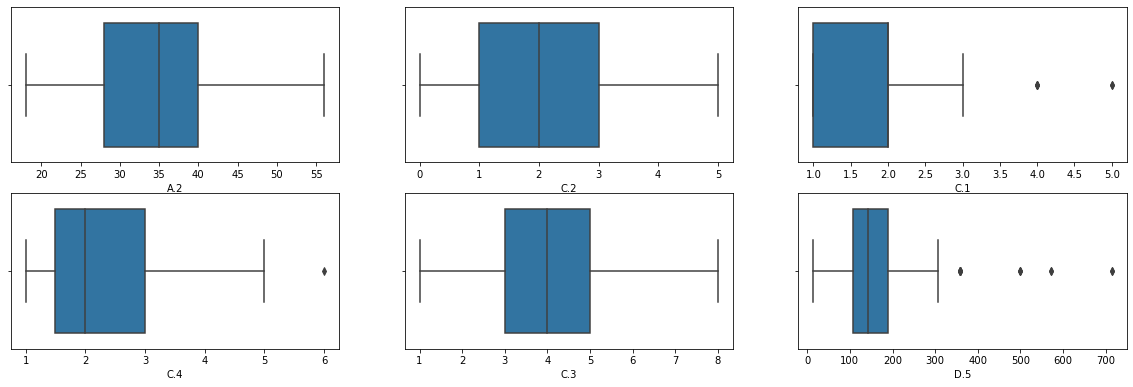

In [15]:
#Boxplot Data Rasio
fig = plt.figure(figsize=(20,20))
for col in range(len(df_new.columns)) :
    fig.add_subplot(6,3,col+1)
    sns.boxplot(x=df_new.iloc[ : , col])
plt.show()

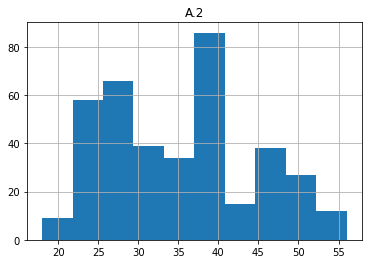

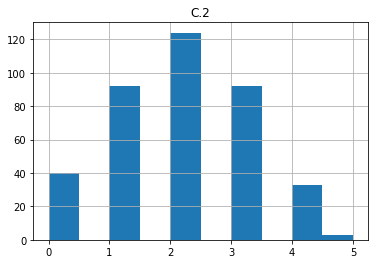

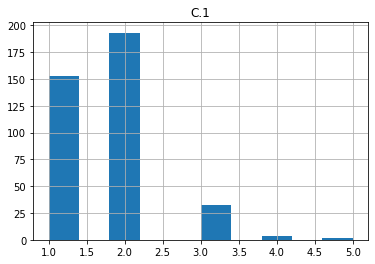

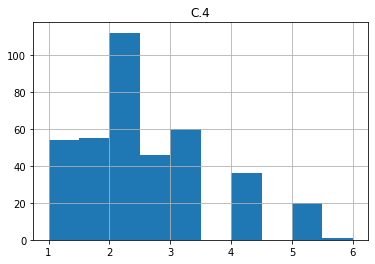

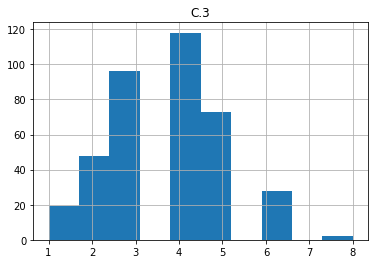

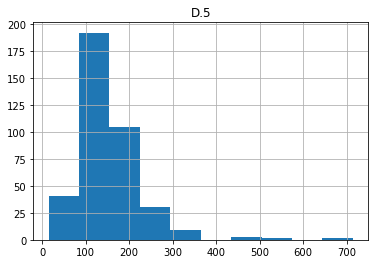

In [16]:
for col in df_new:
    df_new[[col]].hist()

Korelasi Matrix


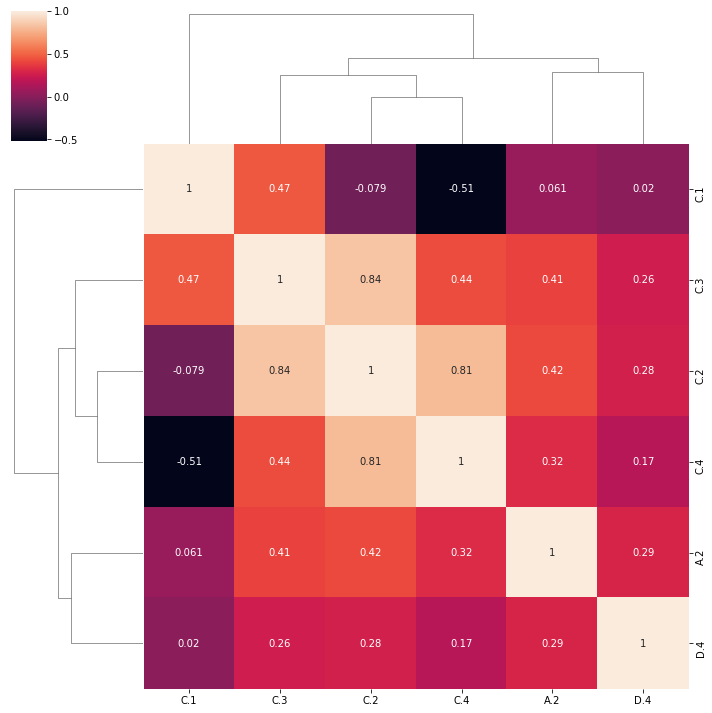

In [17]:
print('Korelasi Matrix')
sns.clustermap(dff.drop(['A.1','A.3','A.4','A.5','A.6','B.1','B.2','D.1','D.2','D.3',
                        'D.5','E.1','E.2','E.3','F.1','F.2','F.3','F.4','F.5','F.6','F.7','F.8'],axis=1).corr(),annot=True)
plt.grid(False)
plt.show()

In [18]:
#Normalisasi
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(dff)

In [20]:
dfn = pd.DataFrame(X_scaled) 

In [21]:
dfn

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.315789,0.00,0.4,0.0,0.00,0.666667,0.666667,0.00,0.2,...,0.75,1.00,0.75,0.50,0.75,0.75,0.75,0.50,0.50,0.50
1,0.0,0.578947,0.00,0.4,0.0,1.00,0.666667,1.000000,0.25,0.4,...,1.00,0.75,0.75,0.50,0.75,0.75,1.00,0.75,0.75,1.00
2,0.0,0.526316,0.00,0.4,0.0,1.00,0.666667,0.666667,0.00,0.4,...,0.75,1.00,1.00,0.75,0.75,0.50,0.50,0.50,0.50,0.75
3,0.0,0.236842,0.25,0.4,0.0,1.00,1.000000,0.666667,0.25,0.4,...,1.00,0.75,0.75,1.00,1.00,0.75,0.50,0.75,1.00,0.75
4,1.0,0.263158,0.25,0.4,0.0,1.00,1.000000,1.000000,0.50,0.4,...,1.00,0.75,0.75,0.75,1.00,0.50,0.75,1.00,1.00,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0.0,0.315789,0.00,0.4,0.0,0.75,1.000000,0.666667,0.25,0.2,...,1.00,0.75,0.25,0.50,0.50,0.25,1.00,0.25,0.50,0.25
380,0.0,0.710526,0.00,0.4,0.0,0.00,1.000000,0.666667,0.25,0.6,...,1.00,1.00,0.75,0.75,0.75,0.75,0.50,0.50,0.50,0.50
381,0.0,0.526316,0.00,0.2,0.0,1.00,0.333333,0.333333,0.00,0.4,...,0.50,0.75,0.50,0.50,0.50,0.50,0.25,0.50,0.50,0.50
382,0.0,0.578947,0.00,0.4,0.0,0.25,0.666667,1.000000,0.00,0.6,...,1.00,0.75,0.50,0.25,0.50,0.25,0.25,0.50,0.50,0.50


In [22]:
dfn.describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,...,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,0.257812,0.451754,0.078776,0.454167,0.020833,0.630208,0.643229,0.677083,0.180339,0.397396,...,0.703776,0.699219,0.626302,0.557292,0.550781,0.555990,0.547526,0.568359,0.582682,0.592448
std,0.438001,0.240013,0.162025,0.203836,0.116614,0.348868,0.225385,0.216538,0.175705,0.229185,...,0.160507,0.179823,0.192885,0.199474,0.226419,0.217817,0.221673,0.195531,0.210292,0.205779
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.263158,0.000000,0.400000,0.000000,0.500000,0.666667,0.666667,0.000000,0.200000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
50%,0.000000,0.447368,0.000000,0.400000,0.000000,0.750000,0.666667,0.666667,0.250000,0.400000,...,0.750000,0.750000,0.750000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,0.578947,0.000000,0.600000,0.000000,1.000000,0.666667,0.666667,0.250000,0.600000,...,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
dfn.columns

RangeIndex(start=0, stop=28, step=1)

In [24]:
dfn.describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,...,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,0.257812,0.451754,0.078776,0.454167,0.020833,0.630208,0.643229,0.677083,0.180339,0.397396,...,0.703776,0.699219,0.626302,0.557292,0.550781,0.555990,0.547526,0.568359,0.582682,0.592448
std,0.438001,0.240013,0.162025,0.203836,0.116614,0.348868,0.225385,0.216538,0.175705,0.229185,...,0.160507,0.179823,0.192885,0.199474,0.226419,0.217817,0.221673,0.195531,0.210292,0.205779
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.263158,0.000000,0.400000,0.000000,0.500000,0.666667,0.666667,0.000000,0.200000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
50%,0.000000,0.447368,0.000000,0.400000,0.000000,0.750000,0.666667,0.666667,0.250000,0.400000,...,0.750000,0.750000,0.750000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,0.578947,0.000000,0.600000,0.000000,1.000000,0.666667,0.666667,0.250000,0.600000,...,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
fig = plt.figure(figsize=(30,30))
for col in range(len(dfn.columns)) :
    fig.add_subplot(8,4,col+1)
    sns.boxplot(x=dfn.iloc[ : , col])
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca.fit(dfn)
dfc = pca.transform(dfn)

In [ ]:
print(pca.components_)

In [ ]:
print(pca.explained_variance_) #yang baik apabila >70%

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_));

In [ ]:
dfc.shape

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
db = DBSCAN(eps=0.5, min_samples=4).fit(dfc)
labels = db.labels_

In [ ]:
plt.scatter(dfc[:, 0], dfc[:, 1],
            c= labels.astype(float), edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from math import ceil , log

In [ ]:
nbrs = NearestNeighbors(n_neighbors=len(dfc)).fit(dfc)
distances, indices = nbrs.kneighbors(dfc)

dbscan = DBSCAN(eps=ceil(distances.mean()),min_samples=ceil(log(df.shape[1])))
dbscan.fit(dfc)

In [ ]:
from sklearn.metrics import silhouette_score
print('silhouette_score:', silhouette_score(dfc,labels))